In [1]:
print("CV Project")


CV Project


In [5]:
import zipfile
import os

zip_path = "archive.zip"  # Change this if your file has a different name
extract_path = "./PKLot"  # Extracted folder location

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")


Dataset extracted successfully!


In [3]:
os.listdir(extract_path)


['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']

In [4]:
import os

dataset_path = "./PKLot"  # Change if needed

print("✅ Dataset Structure:")
print(os.listdir(dataset_path))

# Check subfolders inside 'train', 'valid', and 'test'
for split in ["train", "valid", "test"]:
    split_path = os.path.join(dataset_path, split)
    if os.path.exists(split_path):
        print(f"\nContents of '{split}':", os.listdir(split_path))
    else:
        print(f"\n⚠️ '{split}' folder not found!")


✅ Dataset Structure:
['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']

Contents of 'train': ['2012-09-11_15_16_58_jpg.rf.61d961a86c9a16694403dfcb72cd450c.jpg', '2012-09-11_15_27_08_jpg.rf.0f38b15658ce17d10ce40a992adae5ba.jpg', '2012-09-11_15_29_29_jpg.rf.3819d0bdff07fb09e87e5cc7d51dc662.jpg', '2012-09-11_15_31_50_jpg.rf.b33fc3bf053074e8dab4fa16108b950c.jpg', '2012-09-11_15_38_53_jpg.rf.bcdabdb175b85ebb981248ddc666e1d7.jpg', '2012-09-11_15_43_35_jpg.rf.6a3a3c38c0b7e56174dff7a2028b5ccd.jpg', '2012-09-11_15_55_21_jpg.rf.b96c1ba21a88e75e460e8149a886aa30.jpg', '2012-09-11_16_02_25_jpg.rf.eba5df67eba60842066f6da6b7e3f916.jpg', '2012-09-11_16_10_41_jpg.rf.acfbc89930f9e634223cc4bc9b0ebb06.jpg', '2012-09-11_16_15_24_jpg.rf.977a78d181720a089f4ef4abcf7926a3.jpg', '2012-09-11_16_20_06_jpg.rf.901497d9edde7c48c8020334fb8d9aae.jpg', '2012-09-11_16_24_53_jpg.rf.790f7cbe2158bf835d4b85f757d9d6d5.jpg', '2012-09-11_16_29_30_jpg.rf.d2f66cfac7ebb008dec63e9f87302fc4.jpg', '2012-09-11_1

In [2]:
import os

dataset_path = "./PKLot"  # Adjust if needed

# Check the main dataset folder
print("✅ Main Dataset Folder:")
print(os.listdir(dataset_path))

# Check the subfolders inside 'train', 'valid', and 'test'
for split in ["train", "valid", "test"]:
    split_path = os.path.join(dataset_path, split)
    if os.path.exists(split_path):
        print(f"\n📂 Contents of '{split}':")
        print(os.listdir(split_path))

        # Check if 'images' and 'labels' exist inside each split
        images_path = os.path.join(split_path, "images")
        labels_path = os.path.join(split_path, "labels")

        if os.path.exists(images_path):
            print(f"   ✅ Images found in '{split}/images'")

        if os.path.exists(labels_path):
            print(f"   ✅ Labels found in '{split}/labels'")
        else:
            print(f"   ⚠️ No labels found in '{split}/labels' (Might need conversion!)")
    else:
        print(f"\n⚠️ '{split}' folder not found!")


✅ Main Dataset Folder:
['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']

📂 Contents of 'train':
['2012-09-11_15_16_58_jpg.rf.61d961a86c9a16694403dfcb72cd450c.jpg', '2012-09-11_15_27_08_jpg.rf.0f38b15658ce17d10ce40a992adae5ba.jpg', '2012-09-11_15_29_29_jpg.rf.3819d0bdff07fb09e87e5cc7d51dc662.jpg', '2012-09-11_15_31_50_jpg.rf.b33fc3bf053074e8dab4fa16108b950c.jpg', '2012-09-11_15_38_53_jpg.rf.bcdabdb175b85ebb981248ddc666e1d7.jpg', '2012-09-11_15_43_35_jpg.rf.6a3a3c38c0b7e56174dff7a2028b5ccd.jpg', '2012-09-11_15_55_21_jpg.rf.b96c1ba21a88e75e460e8149a886aa30.jpg', '2012-09-11_16_02_25_jpg.rf.eba5df67eba60842066f6da6b7e3f916.jpg', '2012-09-11_16_10_41_jpg.rf.acfbc89930f9e634223cc4bc9b0ebb06.jpg', '2012-09-11_16_15_24_jpg.rf.977a78d181720a089f4ef4abcf7926a3.jpg', '2012-09-11_16_20_06_jpg.rf.901497d9edde7c48c8020334fb8d9aae.jpg', '2012-09-11_16_24_53_jpg.rf.790f7cbe2158bf835d4b85f757d9d6d5.jpg', '2012-09-11_16_29_30_jpg.rf.d2f66cfac7ebb008dec63e9f87302fc4.jpg', '2012-09-

In [3]:
import os

dataset_path = "./PKLot"  # Adjust this if needed

for split in ["train", "valid"]:
    json_file = os.path.join(dataset_path, split, "_annotations.coco.json")
    if os.path.exists(json_file):
        print(f" Found annotation file: {json_file}")
    else:
        print(f" No annotation file found in '{split}'")


✅ Found annotation file: ./PKLot\train\_annotations.coco.json
✅ Found annotation file: ./PKLot\valid\_annotations.coco.json


In [ ]:
# CONVERTING JSON TO YOLO FORMAT

In [4]:
import os
import json

# Define the dataset path
dataset_path = "./PKLot"

# Define class names (make sure they match your dataset)
class_names = ["spaces", "space-empty", "space-occupied"]

def convert_json_to_yolo(json_file, label_dir):
    """Convert COCO JSON format to YOLO format and save labels."""
    with open(json_file, "r") as f:
        data = json.load(f)

    # Create labels directory if not exists
    os.makedirs(label_dir, exist_ok=True)

    for img_data in data["images"]:
        img_id = img_data["id"]
        img_width = img_data["width"]
        img_height = img_data["height"]

        label_filename = os.path.join(label_dir, os.path.splitext(img_data["file_name"])[0] + ".txt")

        with open(label_filename, "w") as label_file:
            for annotation in data["annotations"]:
                if annotation["image_id"] == img_id:
                    category_id = annotation["category_id"]
                    class_id = class_names.index(data["categories"][category_id]["name"])

                    bbox = annotation["bbox"]  # [x_min, y_min, width, height]

                    # Convert COCO format to YOLO format
                    x_center = (bbox[0] + bbox[2] / 2) / img_width
                    y_center = (bbox[1] + bbox[3] / 2) / img_height
                    width = bbox[2] / img_width
                    height = bbox[3] / img_height

                    # Write YOLO format labels
                    label_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

    print(f"✅ Converted {json_file} -> YOLO labels saved in {label_dir}")


# Convert both 'train' and 'valid' datasets
for split in ["train", "valid"]:
    json_path = os.path.join(dataset_path, split, "_annotations.coco.json")
    label_path = os.path.join(dataset_path, split, "labels")

    if os.path.exists(json_path):
        convert_json_to_yolo(json_path, label_path)
    else:
        print(f"⚠️ No annotation file found for {split}, skipping conversion.")


✅ Converted ./PKLot\train\_annotations.coco.json -> YOLO labels saved in ./PKLot\train\labels
✅ Converted ./PKLot\valid\_annotations.coco.json -> YOLO labels saved in ./PKLot\valid\labels


In [5]:
for split in ["train", "valid"]:
    label_path = os.path.join(dataset_path, split, "labels")
    if os.path.exists(label_path):
        print(f"✅ Labels found in '{split}/labels':", len(os.listdir(label_path)))
    else:
        print(f"❌ No labels found in '{split}/labels'!")


✅ Labels found in 'train/labels': 8691
✅ Labels found in 'valid/labels': 2483


In [7]:
import os
import shutil

dataset_path = "./PKLot"

for split in ["train", "valid"]:
    split_path = os.path.join(dataset_path, split)
    
    images_path = os.path.join(split_path, "images")
    labels_path = os.path.join(split_path, "labels")

    # Create subfolders if they don't exist
    os.makedirs(images_path, exist_ok=True)
    os.makedirs(labels_path, exist_ok=True)

    # Move images to "images" folder
    for file in os.listdir(split_path):
        if file.endswith((".jpg", ".png")):
            shutil.move(os.path.join(split_path, file), os.path.join(images_path, file))

        elif file.endswith(".txt"):  # Move labels to "labels" folder
            shutil.move(os.path.join(split_path, file), os.path.join(labels_path, file))

print("✅ Images and labels have been organized into subfolders!")


✅ Images and labels have been organized into subfolders!


In [ ]:
#to check image and label counts.

In [8]:
import os

dataset_path = "./PKLot"

for split in ["train", "valid"]:
    images_path = os.path.join(dataset_path, split, "images")
    labels_path = os.path.join(dataset_path, split, "labels")

    num_images = len(os.listdir(images_path)) if os.path.exists(images_path) else 0
    num_labels = len(os.listdir(labels_path)) if os.path.exists(labels_path) else 0

    print(f" {split.upper()} SET:")
    print(f"    Total Images: {num_images}")
    print(f"    Total Labels: {num_labels}\n")


📂 TRAIN SET:
   🖼️ Total Images: 8691
   🏷️ Total Labels: 8691

📂 VALID SET:
   🖼️ Total Images: 2483
   🏷️ Total Labels: 2483



In [ ]:
# changing label id's for Train images

In [6]:
import os

label_folder = r'C:\Users\rakshita\parking\datasets\PKLot\train\labels'

# Mapping: old class → new class
label_map = {
    '1': '1',  # space-occupied remains 1
    '2': '0'   # space-empty becomes 0
}

for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(label_folder, filename)
        new_lines = []

        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                class_id = parts[0]
                if class_id in label_map:
                    new_class_id = label_map[class_id]
                    new_line = " ".join([new_class_id] + parts[1:])
                    new_lines.append(new_line)
                else:
                    print(f"⚠️ Skipping unknown class ID '{class_id}' in {filename}")

        # Overwrite with updated labels
        with open(file_path, 'w') as f:
            f.write("\n".join(new_lines))

print("✅ Label IDs corrected to match dataset.yaml")


✅ Label IDs corrected to match dataset.yaml


In [ ]:
# changing label id's for Valid images

In [7]:
import os

label_folder = r'C:\Users\rakshita\parking\datasets\PKLot\valid\labels' 

# Mapping: old class → new class
label_map = {
    '1': '1',  # space-occupied remains 1
    '2': '0'   # space-empty becomes 0
}

for filename in os.listdir(label_folder):
    if filename.endswith(".txt"):
        file_path = os.path.join(label_folder, filename)
        new_lines = []

        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                class_id = parts[0]
                if class_id in label_map:
                    new_class_id = label_map[class_id]
                    new_line = " ".join([new_class_id] + parts[1:])
                    new_lines.append(new_line)
                else:
                    print(f"⚠️ Skipping unknown class ID '{class_id}' in {filename}")

        # Overwrite with updated labels
        with open(file_path, 'w') as f:
            f.write("\n".join(new_lines))

print(" Label IDs corrected to match dataset.yaml")


 Label IDs corrected to match dataset.yaml


In [10]:
#Prepare Dataset Configuration File

In [11]:
dataset_yaml = """ 
path: ./PKLot
train: train/images
val: valid/images
names:
  0: space-empty
  1: space-occupied
"""

with open("dataset.yaml", "w") as f:
    f.write(dataset_yaml)

print("✅ Dataset YAML file created successfully!")


✅ Dataset YAML file created successfully!


In [13]:
with open("dataset.yaml", "r") as f:
    print(f.read())


 
path: ./PKLot
train: train/images
val: valid/images
names:
  0: space-empty
  1: space-occupied



In [ ]:
# Train Yolov8

In [2]:
import numpy as np
import cv2
import torch
from ultralytics import YOLO

print("All libraries imported successfully!")


All libraries imported successfully!


In [10]:
model = YOLO("yolov8n.yaml")  

In [11]:
model.train(data="C:/Users/rakshita/parking/datasets/PKLot/dataset.yaml", epochs=20, imgsz=320, batch=4, device="cpu")


New https://pypi.org/project/ultralytics/8.3.105 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.91  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:/Users/rakshita/parking/datasets/PKLot/dataset.yaml, epochs=20, time=None, patience=100, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fa

train: Scanning C:\Users\rakshita\parking\datasets\PKLot\train\labels... 8691 images, 189 backgrounds, 0 corrupt: 100%|


train: New cache created: C:\Users\rakshita\parking\datasets\PKLot\train\labels.cache


val: Scanning C:\Users\rakshita\parking\datasets\PKLot\valid\labels... 2483 images, 59 backgrounds, 0 corrupt: 100%|███


val: New cache created: C:\Users\rakshita\parking\datasets\PKLot\valid\labels.cache
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      3.716      2.126      2.015        261        320: 100%|██████████| 2173/2173 [10:40<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.642      0.709      0.737      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G       1.87      1.018      1.088        252        320: 100%|██████████| 2173/2173 [10:32<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.913      0.923      0.955       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.521     0.8072     0.9892        200        320: 100%|██████████| 2173/2173 [10:16<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.929      0.943      0.966       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.355     0.7216     0.9478        225        320: 100%|██████████| 2173/2173 [12:07<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [02:


                   all       2483     143316      0.942      0.954       0.97      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.249     0.6613     0.9228        211        320: 100%|██████████| 2173/2173 [16:47<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [02:


                   all       2483     143316      0.948       0.96      0.968      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.169      0.621     0.9065        247        320: 100%|██████████| 2173/2173 [16:38<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [02:


                   all       2483     143316      0.951      0.964      0.973       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.118     0.5941     0.8964         62        320: 100%|██████████| 2173/2173 [16:33<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [02:


                   all       2483     143316      0.953      0.964      0.977      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.067      0.575     0.8874        330        320: 100%|██████████| 2173/2173 [16:36<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [02:


                   all       2483     143316      0.956      0.968      0.977      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G       1.03     0.5562     0.8804        202        320: 100%|██████████| 2173/2173 [11:34<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.959       0.97      0.975      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      0.998     0.5401     0.8731        151        320: 100%|██████████| 2173/2173 [10:13<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.958       0.97      0.978      0.785
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.8694     0.4987     0.8594        234        320: 100%|██████████| 2173/2173 [09:30<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316       0.96      0.971      0.982      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.8212      0.479     0.8503        219        320: 100%|██████████| 2173/2173 [09:27<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316       0.96       0.97      0.984        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.7879     0.4634     0.8446        156        320: 100%|██████████| 2173/2173 [09:33<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.961      0.971      0.986      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.7649     0.4542     0.8399        108        320: 100%|██████████| 2173/2173 [09:35<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.958      0.972      0.988       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.7406     0.4453     0.8374        164        320: 100%|██████████| 2173/2173 [09:34<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.973      0.988      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      0.722     0.4304     0.8332        164        320: 100%|██████████| 2173/2173 [09:35<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.973      0.989      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.7022     0.4262     0.8311        180        320: 100%|██████████| 2173/2173 [09:32<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.973       0.99      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      0.683     0.4186     0.8278        238        320: 100%|██████████| 2173/2173 [09:36<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.963      0.973       0.99      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.6712     0.4111     0.8267        167        320: 100%|██████████| 2173/2173 [09:36<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.973       0.99      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.6575     0.4091     0.8256         96        320: 100%|██████████| 2173/2173 [09:32<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.973       0.99      0.844

20 epochs completed in 4.307 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.91  Python-3.9.21 torch-2.6.0+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 311/311 [01:


                   all       2483     143316      0.962      0.973       0.99      0.844
           space-empty       1967      69687      0.953      0.996      0.991      0.841
        space-occupied       2062      73629      0.972       0.95      0.989      0.848
Speed: 0.4ms preprocess, 16.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D5BA0DC2E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [3]:
model = YOLO("runs/detect/train2/weights/best.pt")



In [4]:
img_path = r"C:\Users\rakshita\parking\testimage.jpg"
results = model.predict(img_path, save=True)



image 1/1 C:\Users\rakshita\parking\testimage.jpg: 320x320 47 space-emptys, 55 space-occupieds, 146.6ms
Speed: 10.7ms preprocess, 146.6ms inference, 15.1ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs\detect\predict2


In [5]:
from PIL import Image

img = Image.open(r"C:\Users\rakshita\parking\runs\detect\predict2\testimage.jpg")
img.show()


In [ ]:
# WORKING WITH CCTV FEEDS

In [ ]:
# CCTV VIDEOS TO SIMULATE LIVE CCTV STREAMS

In [ ]:
import pandas as pd
from ultralytics import YOLO
import cv2
model = YOLO('runs/detect/train2/weights/best.pt')


In [ ]:
# VIDEO FILE 

In [13]:

# Load video
video_path = "parking1.mp4"
cap = cv2.VideoCapture(video_path)

# Get original video details
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("output/predicted_video2.mp4", fourcc, fps, (width, height))

frame_count = 0

# Inference loop
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)
    annotated_frame = results[0].plot()

    out.write(annotated_frame)
    frame_count += 1

cap.release()
out.release()
print(f"✅ Detection complete. {frame_count} frames written to output/fixed_predicted_video.mp4")


✅ Detection complete. 189 frames written to output/fixed_predicted_video.mp4


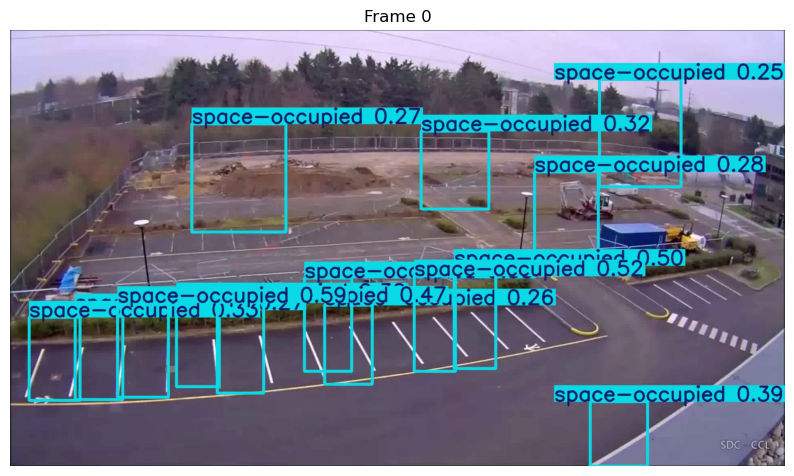

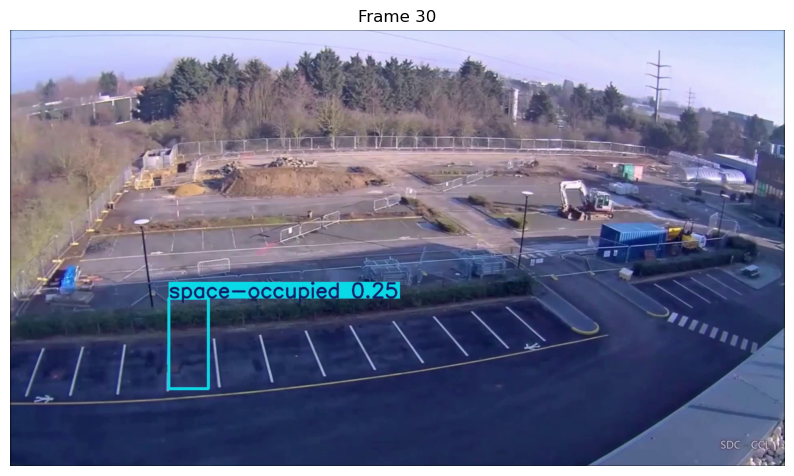

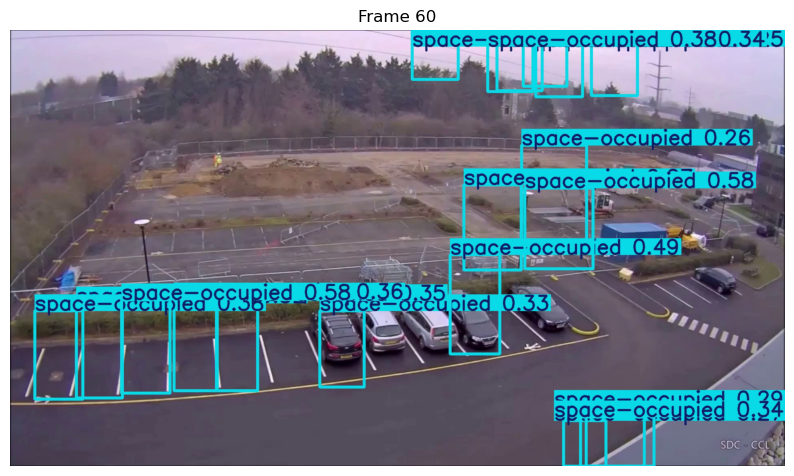

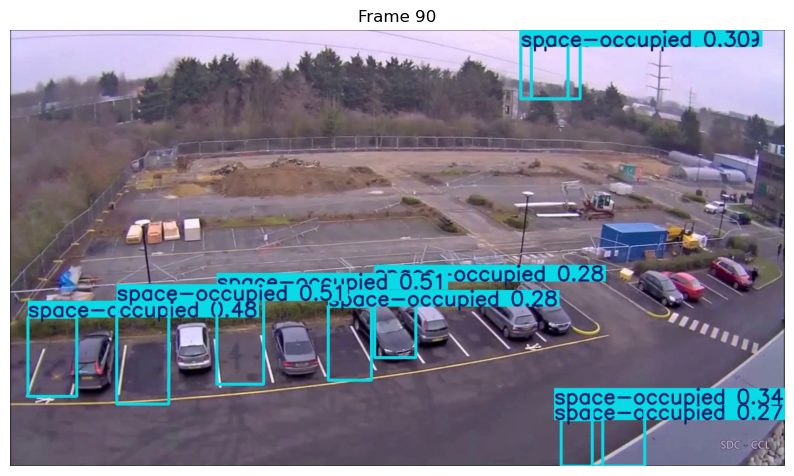

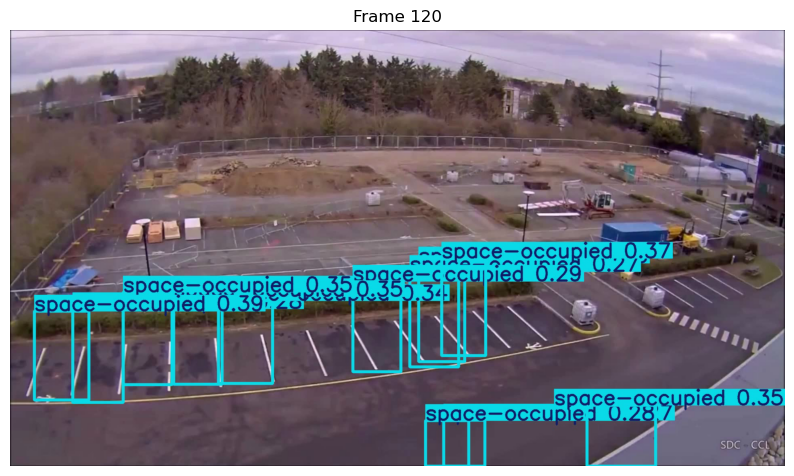

In [18]:
import cv2
import matplotlib.pyplot as plt

video_path = 'output/predicted_video2.mp4'
cap = cv2.VideoCapture(video_path)

frame_rate = 30 
frame_count = 0
shown_frames = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % frame_rate == 0:
        # Convert BGR to RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 6))
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title(f'Frame {frame_count}')
        plt.show()
        shown_frames += 1

        if shown_frames >= 5:  # Limit to 5 preview frames
            break

    frame_count += 1

cap.release()

In [3]:
import os
os.startfile('C:/Users/rakshita/parking/output/predicted_video2.mp4')


In [ ]:
#### performance metrics computation

###### import pandas as pd
from ultralytics import YOLO
import cv2
model = YOLO('runs/detect/train2/weights/best.pt')


In [5]:
# Load video
video_path = "parking1.mp4"
cap = cv2.VideoCapture(video_path)

# Get original video details
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("output/predicted_video2.mp4", fourcc, fps, (width, height))


frame_count = 0
predictions = []  # <-- Initialize a list to collect prediction data

# Inference loop
while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

    # 🔽 Save predictions for this frame
    for box in results[0].boxes.data:
        x1, y1, x2, y2, conf, cls = box.tolist()
        predictions.append({
            'frame': frame_count,
            'class': int(cls),
            'confidence': conf,
            'x1': x1,
            'y1': y1,
            'x2': x2,
            'y2': y2
        })

    frame_count += 1

cap.release()
out.release()
print(f"✅ Detection complete. {frame_count} frames written to output/predicted_video2.mp4")

# ✅ Save all predictions to a CSV file
df_predictions = pd.DataFrame(predictions)
df_predictions.to_csv('output/video_predictions.csv', index=False)
print("📁 Predictions saved to: output/video_predictions.csv")


✅ Detection complete. 189 frames written to output/predicted_video2.mp4
📁 Predictions saved to: output/video_predictions.csv


In [ ]:
## Prepare Ground Truth Annotations for Video

In [ ]:
## Extract Sample Frames from the Video

In [6]:
import cv2
import os

# Create folder to save sample frames
sample_dir = "sample_frames"
os.makedirs(sample_dir, exist_ok=True)

video_path = "parking1.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
interval = frame_count // 10  # Extract 10 frames evenly

frame_idx = 0
saved_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_idx % interval == 0:
        frame_filename = os.path.join(sample_dir, f"frame_{frame_idx}.jpg")
        cv2.imwrite(frame_filename, frame)
        print(f"Saved: {frame_filename}")
        saved_count += 1

    frame_idx += 1
    if saved_count >= 10:
        break

cap.release()
print("✅ Sample frames extracted.")


Saved: sample_frames\frame_0.jpg
Saved: sample_frames\frame_18.jpg
Saved: sample_frames\frame_36.jpg
Saved: sample_frames\frame_54.jpg
Saved: sample_frames\frame_72.jpg
Saved: sample_frames\frame_90.jpg
Saved: sample_frames\frame_108.jpg
Saved: sample_frames\frame_126.jpg
Saved: sample_frames\frame_144.jpg
Saved: sample_frames\frame_162.jpg
✅ Sample frames extracted.
